# Evaluation

In [166]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

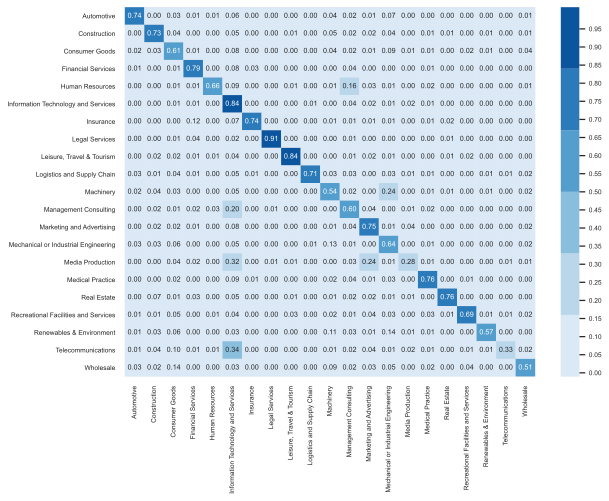

In [267]:
experiments = {
    0: "0_plain",
    1: "1_meta",
    101: "101_meta_only_elements",
    2: "2_meta_headings",
    201: "201_meta_headings_only_elements",
    3: "3_headings_formatting_structure",
    301: "301_headings_formatting_structure_only_elements",
    4: "4_text_formatting",
    401: "401_text_formatting_only_elements",
    5: "5_structure",
    501: "501_structure_only_elements",
    6: "6_all_elements_without_div",
    601: "601_all_elements_without_div_only_elements",
    7: "7_all_elements_with_div",
    701: "7_all_elements_with_div_only_elements",
    8: "8_divs",
    801: "801_divs_only_elements"
}

EXP = experiments[8]
TESTING = False
SUB_DIR = "text"

PATH = f"../results/{SUB_DIR}/{EXP}/"

if TESTING:
    PATH = f"../testresults/{EXP}/"
    
clfreport_svm = pd.read_csv(PATH + f"clfreport__{EXP}_svm.csv", index_col=0)
clfreport_xgb_tree = pd.read_csv(PATH + f"clfreport__{EXP}_xgb_tree.csv", index_col=0)

cm_svm = pd.read_csv(PATH + f"cm__{EXP}_svm.csv", index_col=0)
cm_xgb_tree = pd.read_csv(PATH + f"cm__{EXP}_xgb_tree.csv", index_col=0)

# normalize
cm_svm = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]
cm_xgb_tree = cm_xgb_tree.astype('float') / cm_xgb_tree.sum(axis=1)[:, np.newaxis]

## CLF report

In [258]:
clfreport_svm.tail(3)

,precision,recall,f1-score,support
accuracy,0.707778,0.707778,0.707778,0.707778
macro avg,0.735138,0.685349,0.705313,7573.000000
weighted avg,0.707580,0.707778,0.703498,7573.000000


In [256]:
clfreport_xgb_tree.tail(3)

,precision,recall,f1-score,support
accuracy,0.620230,0.620230,0.620230,0.62023
macro avg,0.676505,0.571365,0.610212,7573.00000
weighted avg,0.629386,0.620230,0.614694,7573.00000


## Confusion Matrices

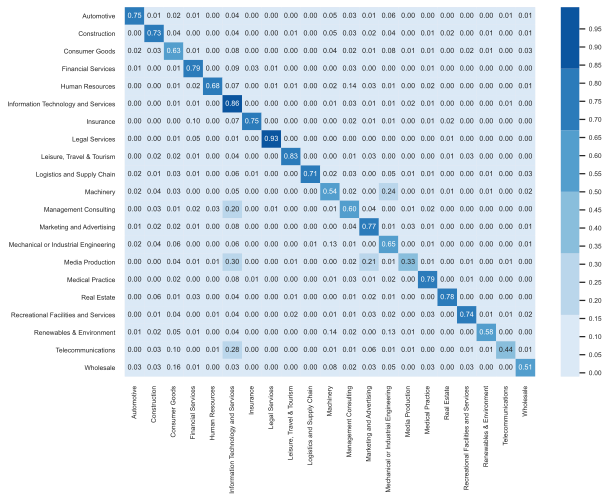

In [225]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(9, 7))
sns.set(font_scale=0.6)
sns.heatmap(cm_svm, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            vmin=-0.01,
            vmax=1.01,
            cbar_kws=dict(ticks=np.arange(0.0, 1.0, 0.05)),
            fmt='.2f')
plt.tight_layout()
plt.savefig("cm.png", dpi=300, facecolor="white", transparent=False)
plt.show()

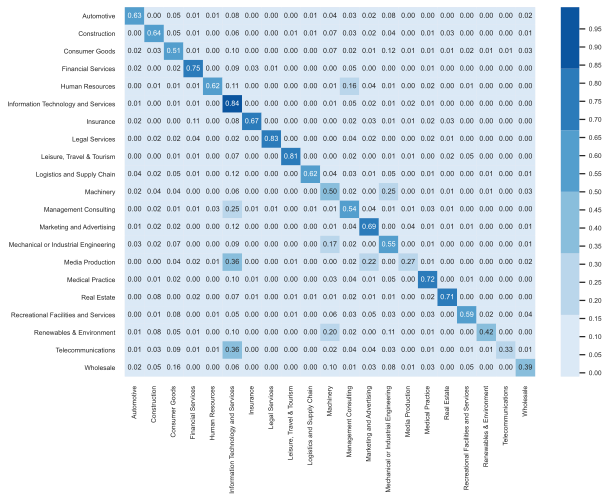

In [226]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(9, 7))
sns.set(font_scale=0.6)
sns.heatmap(cm_xgb_tree, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            vmin=-0.01,
            vmax=1.01,
            cbar_kws=dict(ticks=np.arange(0.0, 1.0, 0.05)),
            fmt='.2f')
plt.tight_layout()
#plt.savefig("cm.png", dpi=300, facecolor="white", transparent=False)
plt.show()

## Coefs & Feature Importance

In [42]:
%%time
# coefs, really big!
#coefs_svm = pd.read_csv(PATH + f"coefs__{EXP}_svm.csv.zip", index_col=0)

# feature importance
coefs_xgb_tree = pd.read_csv(PATH + f"fi__{EXP}_xgb_tree.csv", index_col=0)

CPU times: user 64.8 ms, sys: 93 µs, total: 64.9 ms
Wall time: 62.5 ms


In [26]:
coefs_svm.T.columns

Index(['Automotive', 'Construction', 'Consumer Goods', 'Financial Services',
       'Human Resources', 'Information Technology and Services', 'Insurance',
       'Legal Services', 'Leisure, Travel & Tourism',
       'Logistics and Supply Chain', 'Machinery', 'Management Consulting',
       'Marketing and Advertising', 'Mechanical or Industrial Engineering',
       'Media Production', 'Medical Practice', 'Real Estate',
       'Recreational Facilities and Services', 'Renewables & Environment',
       'Telecommunications', 'Wholesale'],
      dtype='object', name='class')

In [23]:
# svm overall feature importance
coefs_svm.abs().sum().sort_values(ascending=False).head(10)

software      22.837563
it            17.370550
consulting    16.444757
marketing     15.374514
agentur       14.963417
immobilien    14.473487
produkte      14.226936
automotive    14.165377
hotel         13.783960
energy        13.101818
dtype: float64

In [29]:
CLASS = "Automotive"

coefs_svm.T[CLASS].abs().sort_values(ascending=False).head(10)

automotive            4.054991
vehicle               2.754515
car                   2.411623
fahrzeug              2.239449
cars                  2.236066
auto                  2.164586
automobilindustrie    2.138713
vehicles              1.994659
fahrzeuge             1.994090
autohaus              1.960702
Name: Automotive, dtype: float64

In [46]:
coefs_xgb_tree.sort_values(by="value", ascending=False).head(10)

,value
feature,
schaden,0.017495
conosco,0.008740
onlineshop,0.008363
connectivity,0.007976
speed,0.007568
dc,0.006231
baby,0.006104
sortiment,0.006089
recruiter,0.006002


## All Confusion matrices combined

In [233]:
experiments = {
    0: "0_plain",
    1: "1_meta",
    101: "101_meta_only_elements",
    2: "2_meta_headings",
    201: "201_meta_headings_only_elements",
    3: "3_headings_formatting_structure",
    301: "301_headings_formatting_structure_only_elements",
    4: "4_text_formatting",
    401: "401_text_formatting_only_elements",
    5: "5_structure",
    501: "501_structure_only_elements",
    6: "6_all_elements_without_div",
    601: "601_all_elements_without_div_only_elements",
    7: "7_all_elements_with_div",
    701: "701_all_elements_with_div_only_elements",
    8: "8_divs",
    801: "801_divs_only_elements"
}


SUB_DIR = "text"


all_svm_cm = None
all_xgb_tree_cm = None

for _, v in experiments.items():
    EXP = v
    PATH = f"../results/{SUB_DIR}/{EXP}/"

    cm_svm = pd.read_csv(PATH + f"cm__{EXP}_svm.csv", index_col=0)
    cm_xgb_tree = pd.read_csv(PATH + f"cm__{EXP}_xgb_tree.csv", index_col=0)
    if all_svm_cm is None:
        all_svm_cm = cm_svm
    else:
        all_svm_cm += cm_svm
    if all_xgb_tree_cm is None:
        all_xgb_tree_cm = cm_xgb_tree
    else:
        all_xgb_tree_cm += cm_xgb_tree

In [234]:
# normalize
all_svm_cm = all_svm_cm.astype('float') / all_svm_cm.sum(axis=1)[:, np.newaxis]
all_xgb_tree_cm = all_xgb_tree_cm.astype('float') / all_xgb_tree_cm.sum(axis=1)[:, np.newaxis]

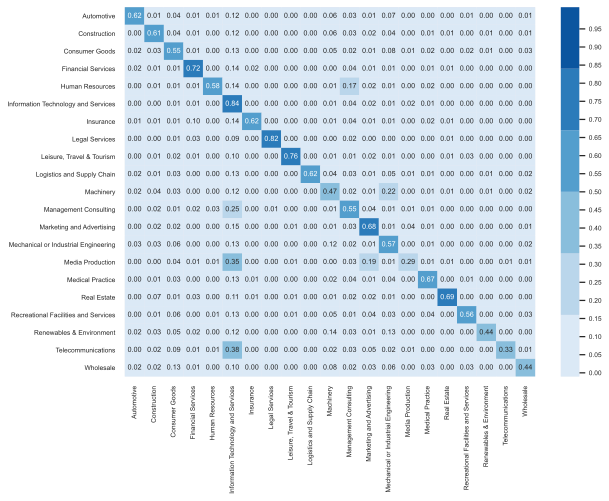

In [236]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(9, 7))
sns.set(font_scale=0.6)
sns.heatmap(all_svm_cm, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            vmin=-0.01,
            vmax=1.01,
            cbar_kws=dict(ticks=np.arange(0.0, 1.0, 0.05)),
            fmt='.2f')
plt.tight_layout()
#plt.savefig(f"../results/text/{SUB_DIR}_all_svm_cm.png", dpi=300, facecolor="white", transparent=False)
plt.show()

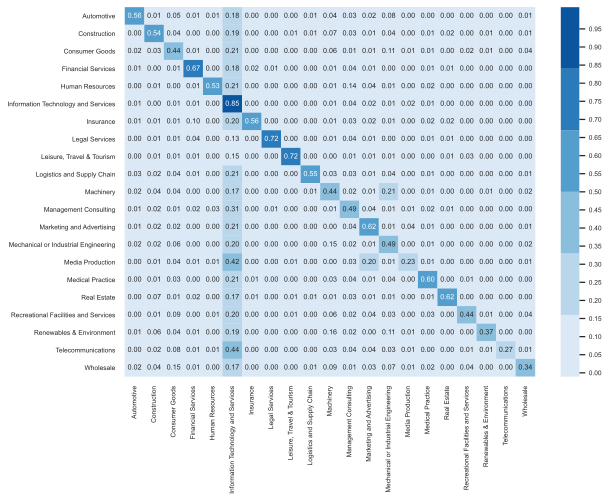

In [235]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(9, 7))
sns.set(font_scale=0.6)
sns.heatmap(all_xgb_tree_cm, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            vmin=-0.01,
            vmax=1.01,
            cbar_kws=dict(ticks=np.arange(0.0, 1.0, 0.05)),
            fmt='.2f')
plt.title("")
plt.tight_layout()
plt.show()